In [18]:
import pandas as pd

In [19]:
df=pd.read_csv('airline_passengers_dataset.csv')

In [20]:
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [21]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [22]:
df=df.dropna()
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


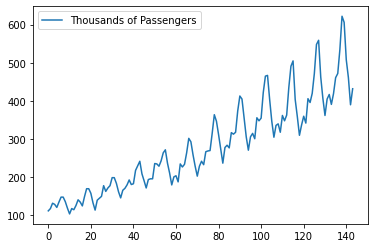

In [24]:
#plot and visualize:

df[['Month','Thousands of Passengers']].plot()

#for fbprophet model,no need to convert it to stationary.

In [25]:
#covert Month to datetime

df['Month']=pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
#rename cols to ds and y as fbprophet model understands only these col names:

df.columns=['ds','y']
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [28]:
from fbprophet import Prophet

In [29]:
model=Prophet()

#Prophet model

In [30]:
model.fit(df)

#train the model

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [48]:
#list of future dates:

old_plus_future=model.make_future_dataframe(90)

#predict the number of passengers in the airline for the next 90 days(3 months)

In [50]:
future_dates=old_plus_future[144:]
future_dates

,ds
144,1960-12-02
145,1960-12-03
146,1960-12-04
147,1960-12-05
148,1960-12-06
...,...
229,1961-02-25
230,1961-02-26
231,1961-02-27
232,1961-02-28


In [56]:
preds=model.predict(future_dates)
preds2=model.predict(old_plus_future)

#model predicts for all these dates

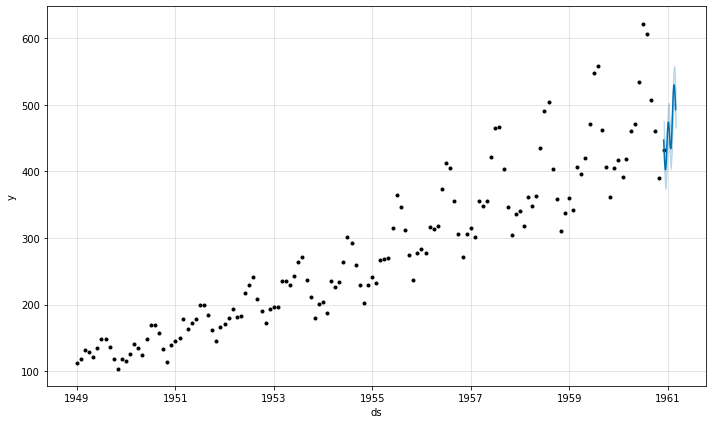

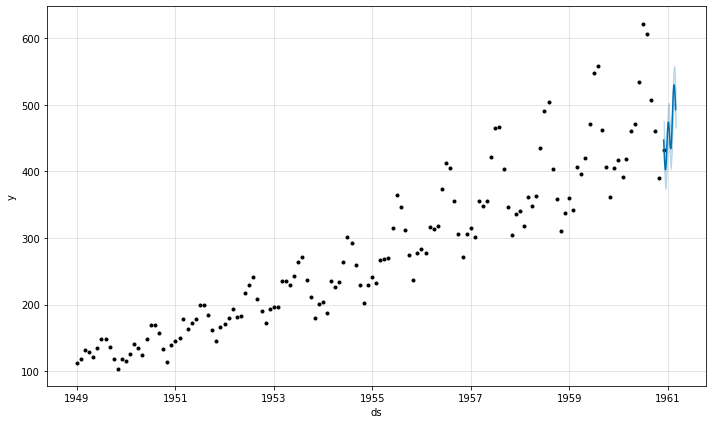

In [57]:
#plot the model's predictions

model.plot(preds)

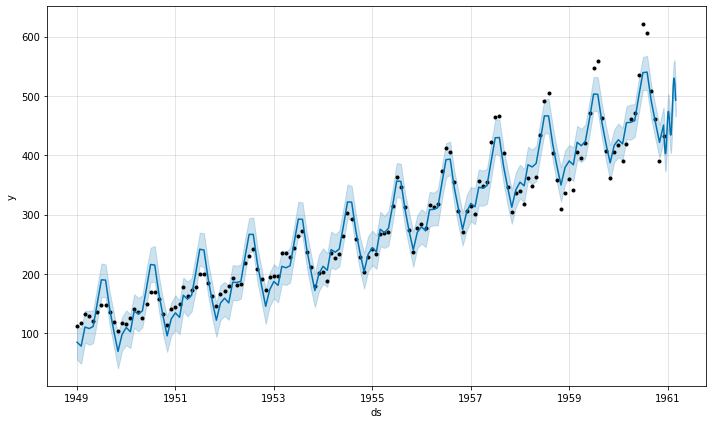

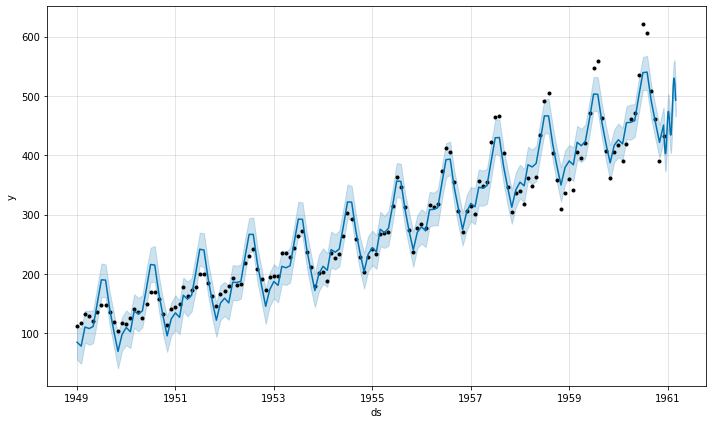

In [59]:
model.plot(preds2)

In [55]:
preds[['ds','yhat_lower','yhat_upper','yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,1960-12-02,415.729634,475.512080,447.085105
1,1960-12-03,413.118450,470.995682,442.875196
2,1960-12-04,408.607022,468.723176,438.411761
3,1960-12-05,406.081722,463.675169,433.800264
4,1960-12-06,400.165686,458.823424,429.150862
...,...,...,...,...
85,1961-02-25,484.437944,541.490254,511.491025
86,1961-02-26,478.000680,535.807241,507.105924
87,1961-02-27,474.417798,531.788244,502.496889
88,1961-02-28,467.189968,528.522002,497.741046
